Utilizing Image-Based Deep Learning to Detect Medical Diagnoses and Manage Treatable Diseases

1. Business Understanding

a) Introduction

b) Problem Statement

c) Main Objective

d) Specific Objectives

f) Data Understanding

2. Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout , BatchNormalization,Activation
from keras.preprocessing.image import ImageDataGenerator,DirectoryIterator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
import cv2
from PIL import Image

In [70]:


labels = ['PNEUMONIA', 'NORMAL']
img_size = 150

def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                
                # Check if img_arr is not empty before resizing
                if img_arr is not None:
                    resized_arr = cv2.resize(img_arr, (img_size, img_size))
                    data.append([resized_arr, class_num])
                else:
                    print(f"Skipped image: {os.path.join(path, img)} - Empty or invalid image")
            except Exception as e:
                print(f"Error processing image: {os.path.join(path, img)} - {str(e)}")
    return np.array(data, dtype=object)


3. Reading the Data

In [21]:
norm_path = 'chest_xray/train/NORMAL/'
pneumonia_path = 'chest_xray/train/PNEUMONIA/'


In [40]:
# Define path to the data directory
data_dir = ['chest_xray/train/NORMAL/', 'chest_xray/train/PNEUMONIA/']

In [34]:
# Combine the paths into a single string representing the data directory
data_dir = os.path.join(*data_dir)

In [62]:
train = 'chest_xray/train'
val = 'chest_xray/val'
test = 'chest_xray/test'

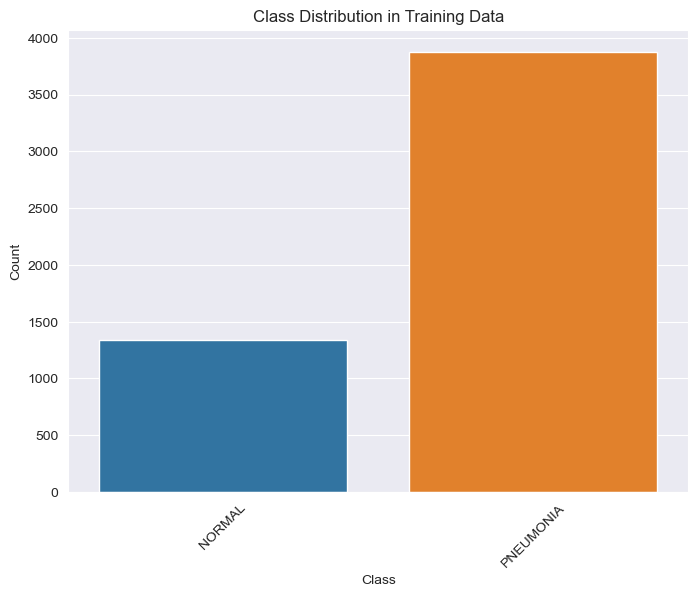

In [63]:
# Define the path to your training directory
train_dir = train

# Get a list of subdirectories in the training directory (each subdirectory represents a class)
class_dirs = os.listdir(train_dir)

# Get the class names based on the subdirectory names
class_names = [class_dir for class_dir in class_dirs if os.path.isdir(os.path.join(train_dir, class_dir))]

# Count the number of images in each class
class_counts = [len(os.listdir(os.path.join(train_dir, class_dir))) for class_dir in class_names]

# Create a countplot to visualize the class distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.barplot(x=class_names, y=class_counts)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in Training Data")
plt.xticks(rotation=45)  # Rotate class names on the x-axis for better visibility
plt.show()

4. Normalization and Data Augmentation

In [77]:
train = get_training_data('chest_xray/train')
val = get_training_data('chest_xray/val')
test = get_training_data('chest_xray/test')

x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)


In [74]:
# The CNN converges faster on [0..1] so normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255
x_train.shape

(5216, 150, 150)

In [75]:
# resize data 
X_train = x_train.reshape(-1, img_size, img_size, 1)
Y_train = np.array(y_train)

X_val = x_val.reshape(-1, img_size, img_size, 1)
Y_val = np.array(y_val)

X_test = x_test.reshape(-1, img_size, img_size, 1)
Y_test = np.array(y_test)
Y_train.shape

(5216,)

In [76]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [78]:
if len(x_train) > 0:
    x_train = np.array(x_train) / 255
    print("x_train shape:", x_train.shape)
else:
    print("x_train is empty")

if len(x_val) > 0:
    x_val = np.array(x_val) / 255
    print("x_val shape:", x_val.shape)
else:
    print("x_val is empty")

if len(x_test) > 0:
    x_test = np.array(x_test) / 255
    print("x_test shape:", x_test.shape)
else:
    print("x_test is empty")

x_train shape: (5216, 150, 150)
x_val shape: (16, 150, 150)
x_test shape: (622, 150, 150)


In [ ]:
5. Training 